In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings(action = 'ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
active_employees=pd.read_excel("../input/active_employees.xlsx")
attrition=pd.read_excel("../input/attrition.xlsx")

dac=active_employees[['Emp.No.', 'Employee Name','Date of Join', 'Present Grade','Department','Location','Gender','Contract Type']]
dac.rename(columns={'Present Grade':'Grade','Contract Type':'Type of employment'},inplace=True)
dac['Attrition']="No"

dat=attrition[['Emp.No.', 'Employee Name','Date of Join', 'Grade','Department','Location','Gender','Leaving Date','Reason',"Status.1"]]
dat.rename(columns={"Status.1":"Type of employment"},inplace=True)
dat['Attrition']="Yes"
dat=dat[dat['Reason'].str.contains("Resignation",na=False)]

df=pd.concat([dac,dat])
df=df[df['Type of employment'].isin({"Permanent","Probationery"})]

In [4]:
consolidated=pd.DataFrame()
def attrition_calculate(df,team):

        consolidated=pd.DataFrame()
        for starting_fy_year in range(2015,2022):
            ending_fy_year=starting_fy_year+1
            
            #Opening headcount
            APR_op=len(df[df['Date of Join']<f"{starting_fy_year}-04-1"])-len(df[df['Leaving Date']<f"{starting_fy_year}-04-1"])
            MAY_op=len(df[df['Date of Join']<f"{starting_fy_year}-05-1"])-len(df[df['Leaving Date']<f"{starting_fy_year}-05-1"])
            JUN_op=len(df[df['Date of Join']<f"{starting_fy_year}-06-1"])-len(df[df['Leaving Date']<f"{starting_fy_year}-06-1"])
            JUL_op=len(df[df['Date of Join']<f"{starting_fy_year}-07-1"])-len(df[df['Leaving Date']<f"{starting_fy_year}-07-1"])
            AUG_op=len(df[df['Date of Join']<f"{starting_fy_year}-08-1"])-len(df[df['Leaving Date']<f"{starting_fy_year}-08-1"])
            SEP_op=len(df[df['Date of Join']<f"{starting_fy_year}-09-1"])-len(df[df['Leaving Date']<f"{starting_fy_year}-09-1"])
            OCT_op=len(df[df['Date of Join']<f"{starting_fy_year}-10-1"])-len(df[df['Leaving Date']<f"{starting_fy_year}-10-1"])
            NOV_op=len(df[df['Date of Join']<f"{starting_fy_year}-11-1"])-len(df[df['Leaving Date']<f"{starting_fy_year}-11-1"])
            DEC_op=len(df[df['Date of Join']<f"{starting_fy_year}-12-1"])-len(df[df['Leaving Date']<f"{starting_fy_year}-12-1"])
            JAN_op=len(df[df['Date of Join']<f"{ending_fy_year}-01-1"])-len(df[df['Leaving Date']<f"{ending_fy_year}-01-1"])
            FEB_op=len(df[df['Date of Join']<f"{ending_fy_year}-02-1"])-len(df[df['Leaving Date']<f"{ending_fy_year}-02-1"])
            MAR_op=len(df[df['Date of Join']<f"{ending_fy_year}-03-1"])-len(df[df['Leaving Date']<f"{ending_fy_year}-03-1"])

            opening_hc=pd.DataFrame([APR_op,MAY_op,JUN_op,JUL_op,AUG_op,SEP_op,OCT_op,NOV_op,DEC_op,JAN_op,FEB_op,MAR_op]).rename(columns={0:"Opening_Headcount"})

            #Closing headcount
            APR_cl=MAY_op
            MAY_cl=JUN_op
            JUN_cl=JUL_op
            JUL_cl=AUG_op
            AUG_cl=SEP_op
            SEP_cl=OCT_op
            OCT_cl=NOV_op
            NOV_cl=DEC_op
            DEC_cl=JAN_op
            JAN_cl=FEB_op
            FEB_cl=MAR_op
            MAR_cl=len(df[df['Date of Join']<f"{ending_fy_year}-04-1"])-len(df[df['Leaving Date']<f"{ending_fy_year}-04-1"])

            closing_hc=pd.DataFrame([APR_cl,MAY_cl,JUN_cl,JUL_cl,AUG_cl,SEP_cl,OCT_cl,NOV_cl,DEC_cl,JAN_cl,FEB_cl,MAR_cl]).rename(columns={0:"Closing_Headcount"})

            #Exits
            APR_ex=len(df[(df['Leaving Date']>=f"{starting_fy_year}-04-01") & (df['Leaving Date']<=f"{starting_fy_year}-04-30")])
            MAY_ex=len(df[(df['Leaving Date']>=f"{starting_fy_year}-05-01") & (df['Leaving Date']<=f"{starting_fy_year}-05-31")])
            JUN_ex=len(df[(df['Leaving Date']>=f"{starting_fy_year}-06-01") & (df['Leaving Date']<=f"{starting_fy_year}-06-30")])
            JUL_ex=len(df[(df['Leaving Date']>=f"{starting_fy_year}-07-01") & (df['Leaving Date']<=f"{starting_fy_year}-07-31")])
            AUG_ex=len(df[(df['Leaving Date']>=f"{starting_fy_year}-08-01") & (df['Leaving Date']<=f"{starting_fy_year}-08-31")])
            SEP_ex=len(df[(df['Leaving Date']>=f"{starting_fy_year}-09-01") & (df['Leaving Date']<=f"{starting_fy_year}-09-30")])
            OCT_ex=len(df[(df['Leaving Date']>=f"{starting_fy_year}-10-01") & (df['Leaving Date']<=f"{starting_fy_year}-10-31")])
            NOV_ex=len(df[(df['Leaving Date']>=f"{starting_fy_year}-11-01") & (df['Leaving Date']<=f"{starting_fy_year}-11-30")])
            DEC_ex=len(df[(df['Leaving Date']>=f"{starting_fy_year}-12-01") & (df['Leaving Date']<=f"{starting_fy_year}-12-31")])
            JAN_ex=len(df[(df['Leaving Date']>=f"{ending_fy_year}-01-01") & (df['Leaving Date']<=f"{ending_fy_year}-01-31")])
            FEB_ex=len(df[(df['Leaving Date']>=f"{ending_fy_year}-02-01") & (df['Leaving Date']<=f"{ending_fy_year}-02-28")])
            MAR_ex=len(df[(df['Leaving Date']>=f"{ending_fy_year}-03-01") & (df['Leaving Date']<=f"{ending_fy_year}-03-31")])

            exits=pd.DataFrame([APR_ex,MAY_ex,JUN_ex,JUL_ex,AUG_ex,SEP_ex,OCT_ex,NOV_ex,DEC_ex,JAN_ex,FEB_ex,MAR_ex]).rename(columns={0:"Exits"})


            #Cumulative Exits
            APR_ex_cum=len(df[(df['Leaving Date']>=f"{starting_fy_year}-04-01") & (df['Leaving Date']<=f"{starting_fy_year}-04-30")])
            MAY_ex_cum=len(df[(df['Leaving Date']>=f"{starting_fy_year}-05-01") & (df['Leaving Date']<=f"{starting_fy_year}-05-31")])+APR_ex_cum
            JUN_ex_cum=len(df[(df['Leaving Date']>=f"{starting_fy_year}-06-01") & (df['Leaving Date']<=f"{starting_fy_year}-06-30")])+MAY_ex_cum
            JUL_ex_cum=len(df[(df['Leaving Date']>=f"{starting_fy_year}-07-01") & (df['Leaving Date']<=f"{starting_fy_year}-07-31")])+JUN_ex_cum
            AUG_ex_cum=len(df[(df['Leaving Date']>=f"{starting_fy_year}-08-01") & (df['Leaving Date']<=f"{starting_fy_year}-08-31")])+JUL_ex_cum
            SEP_ex_cum=len(df[(df['Leaving Date']>=f"{starting_fy_year}-09-01") & (df['Leaving Date']<=f"{starting_fy_year}-09-30")])+AUG_ex_cum
            OCT_ex_cum=len(df[(df['Leaving Date']>=f"{starting_fy_year}-10-01") & (df['Leaving Date']<=f"{starting_fy_year}-10-31")])+SEP_ex_cum
            NOV_ex_cum=len(df[(df['Leaving Date']>=f"{starting_fy_year}-11-01") & (df['Leaving Date']<=f"{starting_fy_year}-11-30")])+OCT_ex_cum
            DEC_ex_cum=len(df[(df['Leaving Date']>=f"{starting_fy_year}-12-01") & (df['Leaving Date']<=f"{starting_fy_year}-12-31")])+NOV_ex_cum
            JAN_ex_cum=len(df[(df['Leaving Date']>=f"{ending_fy_year}-01-01") & (df['Leaving Date']<=f"{ending_fy_year}-01-31")])+DEC_ex_cum
            FEB_ex_cum=len(df[(df['Leaving Date']>=f"{ending_fy_year}-02-01") & (df['Leaving Date']<=f"{ending_fy_year}-02-28")])+JAN_ex_cum
            MAR_ex_cum=len(df[(df['Leaving Date']>=f"{ending_fy_year}-03-01") & (df['Leaving Date']<=f"{ending_fy_year}-03-31")])+FEB_ex_cum

            cumulative_exits=pd.DataFrame([APR_ex_cum,MAY_ex_cum,JUN_ex_cum,JUL_ex_cum,AUG_ex_cum,SEP_ex_cum,OCT_ex_cum,NOV_ex_cum,DEC_ex_cum,JAN_ex_cum,FEB_ex_cum,MAR_ex_cum]).rename(columns={0:"Cumulative_Exits"})



            df1=opening_hc
            df1['Month']=pd.DataFrame(['APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','JAN','FEB','MAR'])
            df1['Year']=pd.DataFrame([starting_fy_year,starting_fy_year,starting_fy_year,starting_fy_year,starting_fy_year,starting_fy_year,starting_fy_year,starting_fy_year,starting_fy_year,ending_fy_year,ending_fy_year,ending_fy_year])
            df1['Closing_Headcount']=closing_hc
            df1['Average_Headcount']=(df1['Closing_Headcount']+df1['Opening_Headcount'][0])/2
            df1['Exits']=exits
            df1['Cumulative_Exits']=cumulative_exits
            df1=df1[['Year','Month','Opening_Headcount','Closing_Headcount','Average_Headcount','Exits','Cumulative_Exits']]
            df1['Month_count']=[1,2,3,4,5,6,7,8,9,10,11,12]
            df1['Annualized_Attrition_Percentage']=(df1['Cumulative_Exits']/df1['Average_Headcount'])*(12/df1['Month_count'])
            df1['FY']=f"{starting_fy_year}-{ending_fy_year}"
            
            
            consolidated=consolidated.append(df1)
            consolidated['Team']=team
        consolidated.to_excel(f"../output/attrition_calculation/{team}_attrition.xlsx",index=False)

        
def attrition_summary(data,team,value):
    data=pd.read_excel(f"../output/attrition_calculation/{data}_attrition.xlsx",index_col=0)
    data=pd.pivot_table(data,index="FY",columns="Month",values=value)
    data=data[['APR', 'MAY','JUN','JUL', 'AUG','SEP','OCT', 'NOV', 'DEC', 'JAN','FEB','MAR']]
    data.loc['2021-2022','NOV']="-"
    data.loc['2021-2022','DEC']="-"
    data.loc['2021-2022','JAN']="-"
    data.loc['2021-2022','FEB']="-"
    data.loc['2021-2022','MAR']="-"
    data.to_excel(f"../output/attrition_calculation/{team}_attrition_{value}.xlsx")
    return data

        

In [5]:
overall=df
sales=df[df['Department'].isin(['Sales (H)', 'Sales (M)', 'Sales (HP)'])].reset_index(drop=True)
rndh=df[df['Department']=='R & D (H)']
service=df[df['Department']=='Service (H)']
opns=df.loc[df['Department'].str.contains('OPNS',na=False)]
cp=df.loc[df['Department'].str.contains('CP',na=False)]
ped=df.loc[df['Department'].str.contains('PED',na=False)]
npd=df.loc[df['Department'].str.contains('NPD',na=False)]
qad=df.loc[df['Department'].str.contains('QAD',na=False)]
hrd=df.loc[df['Department'].str.contains('HRD',na=False)]
ib=df.loc[df['Department'].str.contains('IB',na=False)]
parts=df.loc[df['Department'].str.contains('Parts',na=False)]
finance=df.loc[df['Department'].str.contains('FINANCE',na=False)]
it=df.loc[df['Department'].str.contains('IT ',na=False)]
three_w_sns=df.loc[df['Department'].str.contains('3W S&S',na=False)]
da=df.loc[df['Department'].str.contains('DA',na=False)]
mktg=df.loc[df['Department'].str.contains('MKTG',na=False)]
aeg=df.loc[df['Department'].str.contains('AEG',na=False)]
erm=df.loc[df['Department'].str.contains('ERM',na=False)]
comm=df.loc[df['Department'].str.contains('Comm',na=False)]


OVERALL ATTRITION

In [6]:
attrition_calculate(overall,'overall')
attrition_summary('overall','overall','Annualized_Attrition_Percentage')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,0.064840,0.062621,0.055534,0.063498,0.067165,0.075746,0.072056,0.066857,0.06509,0.064556,0.063669,0.062237
2016-2017,0.086347,0.065673,0.060105,0.056877,0.059567,0.066011,0.068012,0.069483,0.070162,0.073024,0.074283,0.074972
2017-2018,0.066152,0.059439,0.062625,0.067318,0.067472,0.065633,0.064958,0.062263,0.061657,0.062975,0.060781,0.061628
2018-2019,0.047017,0.064171,0.088540,0.095289,0.103811,0.098424,0.093369,0.091891,0.086828,0.085441,0.085227,0.08606
2019-2020,0.059259,0.065562,0.066069,0.076453,0.068595,0.068115,0.064330,0.061012,0.058435,0.058924,0.057016,0.058208
2020-2021,0.024725,0.035021,0.028841,0.031893,0.036264,0.037781,0.036437,0.039911,0.039016,0.03917,0.039703,0.042886
2021-2022,0.076781,0.062563,0.070081,0.083557,0.087697,0.095302,0.090676,-,-,-,-,-


In [7]:
attrition_summary('overall','overall','Exits')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,14,13,9,19,18,26,11,7,11,13,12,10
2016-2017,19,10,11,11,16,22,18,18,17,22,19,18
2017-2018,15,12,16,19,16,13,14,10,13,17,9,16
2018-2019,11,19,32,28,32,17,15,19,11,17,19,22
2019-2020,14,17,16,26,9,16,10,9,9,15,9,17
2020-2021,6,11,4,10,13,11,7,16,8,10,11,19
2021-2022,19,12,21,31,26,34,16,-,-,-,-,-


In [8]:
attrition_summary('overall','overall','Closing_Headcount')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,2589,2581,2593,2604,2624,2635,2641,2657,2651,2649,2650,2645
2016-2017,2636,2654,2679,2735,2754,2748,2749,2752,2752,2745,2730,2717
2017-2018,2725,2734,2776,2809,2832,2829,2825,2824,2819,2809,2811,2800
2018-2019,2815,2810,2802,2867,2841,2849,2855,2848,2851,2846,2832,2824
2019-2020,2846,2850,2867,2905,2914,2931,2932,2929,2926,2919,2916,2914
2020-2021,2910,2911,2911,2918,2910,2909,2920,2949,2964,2968,2966,2962
2021-2022,2977,2984,2974,2998,3004,3040,3050,-,-,-,-,-


SALES ATTRITION

In [9]:
attrition_calculate(sales,'sales')
attrition_summary('sales','sales','Annualized_Attrition_Percentage')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,0.056206,0.084507,0.056338,0.056206,0.066821,0.065116,0.063936,0.055814,0.049383,0.055814,0.050622,0.046404
2016-2017,0.055427,0.054795,0.054920,0.067873,0.065306,0.072727,0.069971,0.074492,0.066215,0.059459,0.053933,0.058691
2017-2018,0.052632,0.052402,0.086768,0.091304,0.082937,0.095652,0.081988,0.078091,0.081159,0.083478,0.080632,0.078431
2018-2019,0.000000,0.050955,0.050740,0.109756,0.137705,0.148454,0.148760,0.154639,0.142368,0.153719,0.14876,0.15735
2019-2020,0.046512,0.116279,0.090737,0.124294,0.117514,0.136622,0.116442,0.119318,0.106061,0.108885,0.107642,0.110057
2020-2021,0.086957,0.108499,0.101633,0.086486,0.104537,0.117002,0.100287,0.104779,0.090963,0.090323,0.086176,0.101266
2021-2022,0.129964,0.129496,0.129964,0.152174,0.166120,0.167577,0.149610,-,-,-,-,-


In [10]:
attrition_summary('sales','sales','Exits')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,1,2,0,1,2,1,1,0,0,2,0,0
2016-2017,1,1,1,2,1,2,1,2,0,0,0,2
2017-2018,1,1,3,2,1,3,0,1,2,2,1,1
2018-2019,0,2,1,6,5,4,3,4,1,5,2,5
2019-2020,1,4,1,5,2,5,0,3,0,3,2,3
2020-2021,2,3,2,1,4,4,0,3,0,2,1,6
2021-2022,3,3,3,5,5,4,1,-,-,-,-,-


In [11]:
attrition_summary('sales','sales','Closing_Headcount')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,213,212,212,213,217,216,215,216,218,216,217,217
2016-2017,216,221,220,225,224,223,224,226,226,227,228,226
2017-2018,230,232,235,234,237,234,234,235,234,234,234,233
2018-2019,239,238,240,259,255,252,251,252,254,251,251,250
2019-2020,266,266,279,281,281,277,280,278,278,279,277,277
2020-2021,275,276,274,278,274,270,270,267,280,281,280,276
2021-2022,278,280,278,276,273,273,274,-,-,-,-,-


R&D ATTRITION

In [12]:
attrition_calculate(rndh,'rndh')
attrition_summary('rndh','rndh','Annualized_Attrition_Percentage')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,0.107784,0.053812,0.059172,0.080119,0.098824,0.086580,0.073892,0.069065,0.065041,0.058537,0.053215,0.051724
2016-2017,0.100139,0.100279,0.087912,0.073469,0.071159,0.081081,0.069404,0.064777,0.064953,0.075,0.077391,0.079235
2017-2018,0.032345,0.064865,0.075269,0.071053,0.075294,0.073298,0.062827,0.062745,0.062827,0.059764,0.054189,0.057667
2018-2019,0.061303,0.076726,0.144144,0.137580,0.167010,0.147959,0.130529,0.121982,0.108291,0.100508,0.094259,0.088945
2019-2020,0.060759,0.030303,0.060759,0.074627,0.077903,0.069307,0.059259,0.051852,0.045977,0.041328,0.040305,0.044499
2020-2021,0.029021,0.029056,0.029091,0.029056,0.029091,0.029091,0.032888,0.042604,0.037825,0.033882,0.030766,0.03778
2021-2022,0.139211,0.069525,0.074419,0.083818,0.095105,0.093132,0.083818,-,-,-,-,-


In [13]:
attrition_summary('rndh','rndh','Exits')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,3,0,2,4,5,1,0,1,1,0,0,1
2016-2017,3,3,2,1,2,4,0,1,2,5,3,3
2017-2018,1,3,3,2,3,2,0,2,2,1,0,3
2018-2019,2,3,9,4,9,2,1,2,0,1,1,1
2019-2020,2,0,4,4,3,1,0,0,0,0,1,3
2020-2021,1,1,1,1,1,1,2,4,0,0,0,4
2021-2022,5,0,3,4,5,3,1,-,-,-,-,-


In [14]:
attrition_summary('rndh','rndh','Closing_Headcount')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,333,334,341,339,345,358,361,360,362,362,362,361
2016-2017,358,357,367,374,381,379,380,380,378,375,372,371
2017-2018,371,369,373,389,394,393,393,394,393,392,394,392
2018-2019,391,390,385,393,384,392,396,395,396,396,395,395
2019-2020,395,397,395,409,406,413,415,415,417,418,417,414
2020-2021,413,412,411,412,411,411,420,431,432,436,437,433
2021-2022,429,430,427,426,425,426,426,-,-,-,-,-


SERVICE ATTRITION

In [15]:
attrition_calculate(service,'service')
attrition_summary('service','service','Annualized_Attrition_Percentage')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,0.000000,0.027907,0.037209,0.111628,0.089302,0.131148,0.120160,0.104167,0.105426,0.100465,0.112412,0.107728
2016-2017,0.113744,0.084507,0.074246,0.068182,0.110092,0.099773,0.092873,0.094595,0.114372,0.130909,0.150817,0.152778
2017-2018,0.109339,0.054670,0.071910,0.066667,0.084581,0.078775,0.098392,0.09292,0.100741,0.096214,0.097403,0.09396
2018-2019,0.052632,0.052747,0.105033,0.100840,0.090756,0.092632,0.130751,0.134328,0.119149,0.122293,0.130536,0.160173
2019-2020,0.050526,0.024742,0.049587,0.073469,0.058182,0.056452,0.055300,0.060241,0.053548,0.06303,0.061833,0.077551
2020-2021,0.000000,0.047151,0.031434,0.023576,0.037870,0.031558,0.033879,0.05336,0.052805,0.052381,0.056501,0.06
2021-2022,0.048193,0.096774,0.129555,0.146939,0.127347,0.147239,0.125691,-,-,-,-,-


In [16]:
attrition_summary('service','service','Exits')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,0,1,1,6,0,6,1,0,2,1,4,1
2016-2017,2,1,1,1,5,1,1,2,5,5,6,3
2017-2018,2,0,2,1,3,1,4,1,3,1,2,1
2018-2019,1,1,4,2,1,2,7,3,0,3,4,9
2019-2020,1,0,2,3,0,1,1,2,0,3,1,5
2020-2021,0,2,0,0,2,0,1,4,1,1,2,2
2021-2022,1,3,4,4,1,5,0,-,-,-,-,-


In [17]:
attrition_summary('service','service','Closing_Headcount')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,216,215,215,215,215,212,213,217,215,215,212,212
2016-2017,210,214,219,228,224,229,231,232,231,228,222,220
2017-2018,219,219,225,230,234,237,233,232,230,229,228,227
2018-2019,229,228,230,249,249,248,245,242,243,244,241,235
2019-2020,240,250,249,255,260,261,261,263,263,260,259,255
2020-2021,255,254,254,254,252,252,251,251,250,249,247,245
2021-2022,253,251,249,245,245,244,246,-,-,-,-,-


OPNS ATTRITION

In [18]:
attrition_calculate(opns,'opns')
attrition_summary('opns','opns','Annualized_Attrition_Percentage')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,0.078007,0.065147,0.052004,0.045307,0.041335,0.051892,0.048237,0.045504,0.040448,0.039046,0.03778,0.039003
2016-2017,0.104689,0.065431,0.060936,0.044824,0.040549,0.033720,0.039867,0.041009,0.041973,0.040336,0.039002,0.040042
2017-2018,0.073770,0.073922,0.064516,0.060120,0.047952,0.056169,0.062149,0.054271,0.053601,0.058065,0.05268,0.050352
2018-2019,0.023833,0.035785,0.047809,0.059701,0.052590,0.051896,0.044438,0.041916,0.042667,0.040841,0.039351,0.036072
2019-2020,0.024316,0.024341,0.024365,0.042510,0.033974,0.032389,0.034773,0.030426,0.035266,0.036697,0.033361,0.030581
2020-2021,0.024666,0.024691,0.016461,0.024742,0.029752,0.024793,0.021251,0.018557,0.019264,0.017337,0.015761,0.016529
2021-2022,0.024948,0.024974,0.025000,0.025026,0.035146,0.054679,0.050526,-,-,-,-,-


In [19]:
attrition_summary('opns','opns','Exits')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,3,2,1,1,1,4,1,1,0,1,1,2
2016-2017,4,1,2,0,1,0,3,2,2,1,1,2
2017-2018,3,3,2,2,0,4,4,0,2,4,0,1
2018-2019,1,2,3,4,1,2,0,1,2,1,1,0
2019-2020,1,1,1,4,0,1,2,0,3,2,0,0
2020-2021,1,1,0,2,2,0,0,0,1,0,0,1
2021-2022,1,1,1,1,3,6,1,-,-,-,-,-


In [20]:
attrition_summary('opns','opns','Closing_Headcount')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,460,458,460,464,466,462,461,460,460,459,461,460
2016-2017,457,457,459,477,487,489,486,491,493,492,491,489
2017-2018,487,485,503,509,512,508,504,506,506,503,505,504
2018-2019,503,502,500,501,500,498,499,498,496,495,494,494
2019-2020,493,492,491,494,495,494,492,492,489,487,487,487
2020-2021,486,485,485,483,481,481,481,483,482,482,482,481
2021-2022,481,480,479,478,475,470,469,-,-,-,-,-


CP ATTRITION

In [21]:
attrition_calculate(cp,'cp')
attrition_summary('cp','cp','Annualized_Attrition_Percentage')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,0.000000,0.000000,0.000000,0.000000,0.000000,0.016461,0.028219,0.024691,0.04426,0.039506,0.044893,0.049383
2016-2017,0.000000,0.048000,0.031746,0.023622,0.018898,0.031373,0.054207,0.047431,0.041995,0.037795,0.051948,0.047619
2017-2018,0.000000,0.000000,0.062992,0.047059,0.056471,0.046512,0.053363,0.046693,0.052083,0.056471,0.051337,0.047059
2018-2019,0.188976,0.190476,0.191235,0.166008,0.170751,0.158730,0.136054,0.119048,0.10582,0.105179,0.10431,0.095238
2019-2020,0.195122,0.146939,0.130612,0.170040,0.156098,0.129555,0.125436,0.109756,0.108844,0.108197,0.117205,0.107438
2020-2021,0.000000,0.050847,0.068085,0.051064,0.040851,0.034043,0.043956,0.038298,0.045584,0.062069,0.066116,0.060606
2021-2022,0.214286,0.161435,0.144144,0.108108,0.086486,0.090498,0.093506,-,-,-,-,-


In [22]:
attrition_summary('cp','cp','Exits')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,0,0,0,0,0,1,1,0,2,0,1,1
2016-2017,0,1,0,0,0,1,2,0,0,0,2,0
2017-2018,0,0,2,0,1,0,1,0,1,1,0,0
2018-2019,2,2,2,1,2,1,0,0,0,1,1,0
2019-2020,2,1,1,3,1,0,1,0,1,1,2,0
2020-2021,0,1,1,0,0,0,1,0,1,2,1,0
2021-2022,2,1,1,0,0,1,1,-,-,-,-,-


In [23]:
attrition_summary('cp','cp','Closing_Headcount')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,119,120,121,122,125,125,125,125,123,125,125,125
2016-2017,126,125,127,129,129,130,128,128,129,129,127,127
2017-2018,127,127,127,128,128,131,130,130,129,128,128,128
2018-2019,126,124,123,125,125,124,124,124,124,123,123,124
2019-2020,122,121,121,123,122,123,122,122,121,120,118,118
2020-2021,118,118,117,117,117,117,116,117,116,114,113,113
2021-2022,111,110,109,109,109,108,107,-,-,-,-,-


PED ATTRITION

In [24]:
attrition_calculate(ped,'ped')
attrition_summary('ped','ped','Annualized_Attrition_Percentage')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,0.000000,0.000000,0.000000,0.000000,0.000000,0.015873,0.013605,0.011905,0.021248,0.019048,0.017316,0.023904
2016-2017,0.186047,0.140078,0.155642,0.139535,0.109506,0.106870,0.091255,0.103448,0.091954,0.092308,0.092664,0.084942
2017-2018,0.187500,0.140078,0.124514,0.163424,0.148263,0.123552,0.146748,0.152941,0.135948,0.132283,0.129357,0.126984
2018-2019,0.196721,0.198347,0.199170,0.196721,0.219087,0.182573,0.156491,0.136929,0.133333,0.12,0.109091,0.108787
2019-2020,0.000000,0.051948,0.034632,0.051502,0.041202,0.034188,0.029304,0.025641,0.022792,0.020513,0.018569,0.017021
2020-2021,0.000000,0.000000,0.000000,0.000000,0.000000,0.016878,0.014467,0.0125,0.011111,0.01,0.018182,0.016667
2021-2022,0.000000,0.049793,0.033195,0.075314,0.060251,0.067227,0.057382,-,-,-,-,-


In [25]:
attrition_summary('ped','ped','Exits')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,0,0,0,0,0,1,0,0,1,0,0,1
2016-2017,2,1,2,1,0,1,0,2,0,1,1,0
2017-2018,2,1,1,3,1,0,3,2,0,1,1,1
2018-2019,2,2,2,2,3,0,0,0,1,0,0,1
2019-2020,0,1,0,1,0,0,0,0,0,0,0,0
2020-2021,0,0,0,0,0,1,0,0,0,0,1,0
2021-2022,0,1,0,2,0,1,0,-,-,-,-,-


In [26]:
attrition_summary('ped','ped','Closing_Headcount')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,121,121,123,125,128,131,131,131,130,131,131,130
2016-2017,128,127,127,128,133,132,133,131,131,130,129,129
2017-2018,127,128,128,128,130,130,128,126,126,125,124,123
2018-2019,121,119,118,121,118,118,118,118,117,117,117,116
2019-2020,116,115,115,117,117,118,118,118,118,118,119,119
2020-2021,119,119,119,119,119,118,118,121,121,121,121,121
2021-2022,121,120,120,118,118,117,118,-,-,-,-,-


NPD ATTRITION

In [27]:
attrition_calculate(npd,'npd')
attrition_summary('npd','npd','Annualized_Attrition_Percentage')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,0.048193,0.024048,0.048290,0.085193,0.087273,0.113131,0.118467,0.103659,0.092141,0.087984,0.098361,0.094262
2016-2017,0.100209,0.075157,0.065844,0.049281,0.059259,0.074380,0.078083,0.093555,0.094248,0.09,0.081479,0.079002
2017-2018,0.049793,0.074844,0.066528,0.061983,0.069565,0.066253,0.056671,0.049587,0.044077,0.054658,0.054095,0.049587
2018-2019,0.048880,0.073469,0.114053,0.110204,0.098160,0.089980,0.077125,0.07362,0.065306,0.063544,0.071535,0.065173
2019-2020,0.048485,0.024242,0.065041,0.061100,0.048880,0.057143,0.048980,0.04908,0.04888,0.04898,0.044346,0.044807
2020-2021,0.049485,0.024742,0.016495,0.024793,0.019794,0.016495,0.021251,0.018443,0.021903,0.024691,0.022447,0.024691
2021-2022,0.000000,0.000000,0.000000,0.000000,0.029569,0.041068,0.035057,-,-,-,-,-


In [28]:
attrition_summary('npd','npd','Exits')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,1,0,2,4,2,5,3,0,0,1,4,1
2016-2017,2,1,1,0,2,3,2,4,2,1,0,1
2017-2018,1,2,1,1,2,1,0,0,0,3,1,0
2018-2019,1,2,4,2,1,1,0,1,0,1,3,0
2019-2020,1,0,3,1,0,2,0,1,1,1,0,1
2020-2021,1,0,0,1,0,0,1,0,1,1,0,1
2021-2022,0,0,0,0,3,2,0,-,-,-,-,-


In [29]:
attrition_summary('npd','npd','Closing_Headcount')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,250,251,249,245,247,247,244,244,244,243,240,240
2016-2017,239,239,246,247,246,244,243,241,241,240,242,241
2017-2018,241,240,240,243,242,242,243,243,243,242,243,243
2018-2019,248,247,248,247,246,246,246,246,247,248,245,248
2019-2020,247,247,244,243,243,242,242,241,243,242,244,243
2020-2021,242,242,242,241,242,242,241,245,244,243,243,243
2021-2022,244,244,244,245,244,244,246,-,-,-,-,-


QAD ATTRITION

In [30]:
attrition_calculate(qad,'qad')
attrition_summary('qad','qad','Annualized_Attrition_Percentage')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,0.000000,0.000000,0.000000,0.025751,0.041379,0.034483,0.029557,0.025751,0.034483,0.031034,0.028213,0.025862
2016-2017,0.103004,0.051502,0.034043,0.025316,0.020253,0.033755,0.028933,0.025316,0.033613,0.029876,0.036213,0.033195
2017-2018,0.000000,0.000000,0.032000,0.047619,0.037945,0.031621,0.040816,0.035714,0.031746,0.028571,0.03477,0.031873
2018-2019,0.000000,0.047244,0.031250,0.023077,0.018391,0.015326,0.013086,0.01145,0.020356,0.018321,0.025078,0.022989
2019-2020,0.089888,0.090226,0.090566,0.089552,0.089552,0.074349,0.063492,0.055556,0.049383,0.044444,0.048665,0.04461
2020-2021,0.000000,0.044610,0.029740,0.022305,0.017844,0.014870,0.025586,0.02214,0.01968,0.026667,0.024242,0.022222
2021-2022,0.000000,0.000000,0.089888,0.090226,0.072180,0.060150,0.064690,-,-,-,-,-


In [31]:
attrition_summary('qad','qad','Exits')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,0,0,0,1,1,0,0,0,1,0,0,0
2016-2017,1,0,0,0,0,1,0,0,1,0,1,0
2017-2018,0,0,1,1,0,0,1,0,0,0,1,0
2018-2019,0,1,0,0,0,0,0,0,1,0,1,0
2019-2020,1,1,1,1,1,0,0,0,0,0,1,0
2020-2021,0,1,0,0,0,0,1,0,0,1,0,0
2021-2022,0,0,3,1,0,0,1,-,-,-,-,-


In [32]:
attrition_summary('qad','qad','Closing_Headcount')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,116,116,118,118,117,117,117,118,117,117,117,117
2016-2017,116,116,118,120,120,120,120,120,121,124,124,124
2017-2018,124,124,126,128,129,129,128,128,128,128,127,127
2018-2019,128,127,129,133,134,134,135,135,135,135,134,134
2019-2020,133,132,131,134,134,135,136,136,136,136,135,135
2020-2021,135,134,134,134,134,134,133,136,136,135,135,135
2021-2022,135,135,132,131,131,131,130,-,-,-,-,-


HRD ATTRITION

In [33]:
attrition_calculate(hrd,'hrd')
attrition_summary('hrd','hrd','Annualized_Attrition_Percentage')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2016-2017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.02439,0.021505,0.0384,0.034909,0.032
2017-2018,0.000000,0.000000,0.000000,0.000000,0.035821,0.060150,0.051557,0.068182,0.06015,0.072727,0.065619,0.091603
2018-2019,0.000000,0.000000,0.059701,0.044444,0.071642,0.059259,0.103115,0.090226,0.099502,0.107463,0.097693,0.105263
2019-2020,0.000000,0.090909,0.060150,0.090226,0.072180,0.059259,0.050420,0.044118,0.059259,0.071111,0.064646,0.059259
2020-2021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.015697,0.014184
2021-2022,0.335664,0.166667,0.225352,0.142012,0.112281,0.099502,0.084866,-,-,-,-,-


In [34]:
attrition_summary('hrd','hrd','Exits')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,0,0,0,0,0,0,0,0,0,0,0,0
2016-2017,0,0,0,0,0,0,0,1,0,1,0,0
2017-2018,0,0,0,0,1,1,0,1,0,1,0,2
2018-2019,0,0,1,0,1,0,2,0,1,1,0,1
2019-2020,0,1,0,1,0,0,0,0,1,1,0,0
2020-2021,0,0,0,0,0,0,0,0,0,0,1,0
2021-2022,2,0,2,0,0,1,0,-,-,-,-,-


In [35]:
attrition_summary('hrd','hrd','Closing_Headcount')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,50,50,51,58,59,59,59,59,59,60,61,61
2016-2017,61,62,62,62,62,62,63,62,63,64,64,64
2017-2018,64,65,66,70,70,69,69,68,69,68,69,67
2018-2019,68,68,67,68,67,68,66,66,67,67,67,66
2019-2020,66,66,67,67,67,69,70,70,69,69,69,69
2020-2021,69,69,69,69,69,70,70,70,70,70,70,72
2021-2022,71,72,70,97,99,129,130,-,-,-,-,-


IB ATTRITION

In [36]:
attrition_calculate(ib,'ib')
attrition_summary('ib','ib','Annualized_Attrition_Percentage')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,0.000000,0.000000,0.000000,0.000000,0.000000,0.024390,0.020906,0.018182,0.016162,0.014545,0.013223,0.012048
2016-2017,0.000000,0.000000,0.046784,0.034483,0.027586,0.046243,0.039409,0.052023,0.077973,0.069767,0.063058,0.057803
2017-2018,0.136364,0.067797,0.045198,0.033898,0.054237,0.068182,0.058442,0.068571,0.060606,0.068571,0.061983,0.056497
2018-2019,0.134078,0.066667,0.089385,0.067039,0.107865,0.089385,0.076616,0.066667,0.058608,0.08,0.072727,0.066667
2019-2020,0.000000,0.000000,0.043956,0.066298,0.052747,0.065934,0.056206,0.065934,0.058608,0.066298,0.060271,0.054645
2020-2021,0.000000,0.000000,0.000000,0.031915,0.051337,0.042553,0.036281,0.080645,0.071685,0.06383,0.069632,0.084211
2021-2022,0.000000,0.000000,0.000000,0.091837,0.096482,0.078818,0.101337,-,-,-,-,-


In [37]:
attrition_summary('ib','ib','Exits')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,0,0,0,0,0,1,0,0,0,0,0,0
2016-2017,0,0,1,0,0,1,0,1,2,0,0,0
2017-2018,1,0,0,0,1,1,0,1,0,1,0,0
2018-2019,1,0,1,0,2,0,0,0,0,2,0,0
2019-2020,0,0,1,1,0,1,0,1,0,1,0,0
2020-2021,0,0,0,1,1,0,0,3,0,0,1,2
2021-2022,0,0,0,3,1,0,2,-,-,-,-,-


In [38]:
attrition_summary('ib','ib','Closing_Headcount')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,81,82,83,83,84,83,83,84,84,84,84,85
2016-2017,85,87,86,89,89,88,89,88,86,87,88,88
2017-2018,88,89,89,89,89,88,88,87,88,87,88,89
2018-2019,90,91,90,90,89,90,90,91,93,91,91,91
2019-2020,91,91,91,90,91,91,92,91,91,90,90,92
2020-2021,92,93,94,96,95,96,97,94,94,96,96,98
2021-2022,100,100,101,98,101,105,105,-,-,-,-,-


PARTS ATTRITION

In [39]:
attrition_calculate(parts,'parts')
attrition_summary('parts','parts','Annualized_Attrition_Percentage')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,0.000000,0.000000,0.000000,0.000000,0.035821,0.029630,0.025026,0.021583,0.058394,0.070073,0.063703,0.058394
2016-2017,0.172662,0.086331,0.115942,0.129496,0.102128,0.173913,0.253968,0.220588,0.217284,0.213333,0.211669,0.210526
2017-2018,0.000000,0.000000,0.060606,0.090909,0.183206,0.152672,0.158242,0.162791,0.144703,0.130233,0.118393,0.10687
2018-2019,0.177778,0.086331,0.115942,0.083333,0.100699,0.111888,0.095238,0.082192,0.091954,0.082759,0.075235,0.068966
2019-2020,0.156863,0.157895,0.103226,0.077419,0.061538,0.075949,0.131868,0.115385,0.12043,0.108387,0.099174,0.090323
2020-2021,0.000000,0.000000,0.000000,0.038462,0.061935,0.077922,0.066790,0.058442,0.051613,0.046452,0.042229,0.03871
2021-2022,0.000000,0.000000,0.000000,0.039216,0.063158,0.106667,0.115053,-,-,-,-,-


In [40]:
attrition_summary('parts','parts','Exits')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,0,0,0,0,1,0,0,0,2,1,0,0
2016-2017,1,0,1,1,0,3,4,0,1,1,1,1
2017-2018,0,0,1,1,3,0,1,1,0,0,0,0
2018-2019,1,0,1,0,1,1,0,0,1,0,0,0
2019-2020,1,1,0,0,0,1,3,0,1,0,0,0
2020-2021,0,0,0,1,1,1,0,0,0,0,0,0
2021-2022,0,0,0,1,1,2,1,-,-,-,-,-


In [41]:
attrition_summary('parts','parts','Closing_Headcount')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,67,67,67,67,67,68,70,72,70,70,70,70
2016-2017,69,69,68,69,71,68,65,66,65,65,64,63
2017-2018,63,63,69,69,68,68,67,66,66,66,66,68
2018-2019,67,71,70,76,75,75,76,78,77,77,77,77
2019-2020,76,75,78,78,79,81,79,79,78,78,77,78
2020-2021,78,79,79,78,77,76,76,76,77,77,77,77
2021-2022,77,77,77,76,75,73,72,-,-,-,-,-


FINANCE ATTRITION

In [42]:
attrition_calculate(finance,'finance')
attrition_summary('finance','finance','Annualized_Attrition_Percentage')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,0.000000,0.062827,0.041885,0.094737,0.100524,0.105263,0.107704,0.094241,0.08377,0.087958,0.079545,0.072917
2016-2017,0.000000,0.000000,0.000000,0.000000,0.025000,0.041667,0.035165,0.030612,0.054701,0.074227,0.067479,0.083333
2017-2018,0.125000,0.062176,0.041451,0.158730,0.126984,0.105820,0.087912,0.076531,0.082051,0.073846,0.078725,0.082902
2018-2019,0.123077,0.061538,0.041026,0.061224,0.098969,0.103627,0.106038,0.124352,0.123711,0.11134,0.101218,0.103627
2019-2020,0.000000,0.189474,0.125654,0.093750,0.100524,0.105263,0.090226,0.078947,0.070175,0.063158,0.057416,0.063158
2020-2021,0.000000,0.000000,0.000000,0.031915,0.025532,0.021277,0.018237,0.015957,0.014109,0.012698,0.023211,0.021277
2021-2022,0.000000,0.000000,0.000000,0.032086,0.025532,0.042781,0.036669,-,-,-,-,-


In [43]:
attrition_summary('finance','finance','Exits')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,0,1,0,2,1,1,1,0,0,1,0,0
2016-2017,0,0,0,0,1,1,0,0,2,2,0,2
2017-2018,1,0,0,4,0,0,0,0,1,0,1,1
2018-2019,1,0,0,1,2,1,1,2,1,0,0,1
2019-2020,0,3,0,0,1,1,0,0,0,0,0,1
2020-2021,0,0,0,1,0,0,0,0,0,0,1,0
2021-2022,0,0,0,1,0,1,0,-,-,-,-,-


In [44]:
attrition_summary('finance','finance','Closing_Headcount')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,96,95,95,94,95,94,95,95,95,95,96,96
2016-2017,97,97,97,97,96,96,99,100,99,98,98,96
2017-2018,96,97,97,93,93,93,99,100,99,99,98,97
2018-2019,98,98,98,99,97,96,97,96,97,97,97,96
2019-2020,97,94,95,96,95,94,94,94,94,94,94,94
2020-2021,94,94,95,94,94,94,94,94,95,95,94,94
2021-2022,94,94,94,93,94,93,93,-,-,-,-,-


IT ATTRITION

In [45]:
attrition_calculate(it,'it')
attrition_summary('it','it','Annualized_Attrition_Percentage')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,0.000000,0.093023,0.062016,0.046512,0.113386,0.094488,0.103896,0.090909,0.080808,0.091603,0.100699,0.125
2016-2017,0.000000,0.000000,0.000000,0.046512,0.075000,0.094488,0.108844,0.095238,0.10582,0.094488,0.085898,0.07874
2017-2018,0.000000,0.094488,0.062992,0.094488,0.075591,0.062992,0.053993,0.047244,0.041995,0.057143,0.051948,0.064
2018-2019,0.000000,0.099174,0.201681,0.201681,0.161345,0.134454,0.113341,0.099174,0.088154,0.1,0.110008,0.10084
2019-2020,0.000000,0.101695,0.067797,0.049180,0.079339,0.065574,0.056206,0.04918,0.066116,0.08,0.072727,0.066667
2020-2021,0.195122,0.097561,0.065041,0.098361,0.078049,0.097561,0.082949,0.071429,0.063492,0.057143,0.069818,0.064
2021-2022,0.585366,0.292683,0.327869,0.290323,0.309677,0.250000,0.326531,-,-,-,-,-


In [46]:
attrition_summary('it','it','Exits')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,0,1,0,0,2,0,1,0,0,1,1,2
2016-2017,0,0,0,1,1,1,1,0,1,0,0,0
2017-2018,0,1,0,1,0,0,0,0,0,1,0,1
2018-2019,0,1,2,1,0,0,0,0,0,1,1,0
2019-2020,0,1,0,0,1,0,0,0,1,1,0,0
2020-2021,1,0,0,1,0,1,0,0,0,0,1,0
2021-2022,3,0,2,1,2,0,4,-,-,-,-,-


In [47]:
attrition_summary('it','it','Closing_Headcount')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,65,64,64,64,62,62,67,67,67,66,65,63
2016-2017,63,64,64,66,65,64,63,63,63,64,64,64
2017-2018,64,63,63,63,63,63,63,63,63,62,62,61
2018-2019,61,60,58,58,58,58,60,60,60,59,58,58
2019-2020,60,60,60,64,63,64,64,64,63,62,62,62
2020-2021,61,61,61,60,61,61,62,64,64,64,63,63
2021-2022,60,60,59,61,61,65,63,-,-,-,-,-


3W S&S ATTRITION

In [48]:
attrition_calculate(three_w_sns,'three_w_sns')
attrition_summary('three_w_sns','three_w_sns','Annualized_Attrition_Percentage')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,0.000000,0.084507,0.056338,0.042254,0.102128,0.143885,0.147996,0.152174,0.155718,0.176471,0.159257,0.145985
2016-2017,0.369231,0.184615,0.123077,0.135338,0.108271,0.121212,0.130862,0.1875,0.166667,0.170079,0.17316,0.176
2017-2018,0.410256,0.310345,0.206897,0.155172,0.124138,0.103448,0.088670,0.077586,0.068376,0.061017,0.05547,0.086207
2018-2019,0.000000,0.000000,0.070796,0.162162,0.174545,0.145455,0.157274,0.137615,0.148148,0.133333,0.142736,0.130841
2019-2020,0.242424,0.121212,0.078431,0.058252,0.046154,0.076190,0.098901,0.086538,0.076923,0.069231,0.084731,0.076923
2020-2021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028037,0.024922,0.045283,0.06175,0.056075
2021-2022,0.226415,0.112150,0.074766,0.113208,0.090566,0.114286,0.097959,-,-,-,-,-


In [49]:
attrition_summary('three_w_sns','three_w_sns','Exits')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,0,1,0,0,2,2,1,1,1,2,0,0
2016-2017,2,0,0,1,0,1,1,3,0,1,1,1
2017-2018,2,1,0,0,0,0,0,0,0,0,0,2
2018-2019,0,0,1,2,1,0,1,0,1,0,1,0
2019-2020,1,0,0,0,0,1,1,0,0,0,1,0
2020-2021,0,0,0,0,0,0,0,1,0,1,1,0
2021-2022,1,0,0,1,0,1,0,-,-,-,-,-


In [50]:
attrition_summary('three_w_sns','three_w_sns','Closing_Headcount')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,72,71,71,71,70,68,68,67,66,65,66,66
2016-2017,64,64,64,67,67,66,65,62,62,61,60,59
2017-2018,58,57,57,57,57,57,57,57,58,59,59,57
2018-2019,57,57,56,54,53,53,52,52,51,51,50,50
2019-2020,49,49,52,53,54,55,54,54,54,54,53,54
2020-2021,54,54,54,54,54,54,54,53,53,52,52,53
2021-2022,53,54,54,53,53,52,52,-,-,-,-,-


DA ATTRITION

In [51]:
attrition_calculate(da,'da')
attrition_summary('da','da','Annualized_Attrition_Percentage')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2016-2017,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2017-2018,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2018-2019,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2019-2020,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2020-2021,0.0,0.000000,0.000000,0.000000,0.000000,0.056338,0.047619,0.082192,0.108108,0.097297,0.086124,0.076923
2021-2022,0.0,0.126316,0.082474,0.054545,0.083478,0.067227,0.055300,-,-,-,-,-


In [52]:
attrition_summary('da','da','Exits')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,0,0,0,0,0,0,0,0,0,0,0,0
2016-2017,0,0,0,0,0,0,0,0,0,0,0,0
2017-2018,0,0,0,0,0,0,0,0,0,0,0,0
2018-2019,0,0,0,0,0,0,0,0,0,0,0,0
2019-2020,0,0,0,0,0,0,0,0,0,0,0,0
2020-2021,0,0,0,0,0,1,0,1,1,0,0,0
2021-2022,0,1,0,0,1,0,0,-,-,-,-,-


In [53]:
attrition_summary('da','da','Closing_Headcount')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,13,13,14,14,14,15,15,16,16,16,16,16
2016-2017,16,16,16,16,18,18,18,18,18,18,18,18
2017-2018,18,18,18,18,20,20,20,20,20,21,21,21
2018-2019,21,21,22,22,22,22,22,22,22,22,22,22
2019-2020,23,25,25,28,28,29,29,30,31,31,33,33
2020-2021,34,34,34,36,38,38,39,40,41,41,43,45
2021-2022,46,50,52,65,70,74,79,-,-,-,-,-


MARKETING ATTRITION

In [54]:
attrition_calculate(mktg,'mktg')
attrition_summary('mktg','mktg','Annualized_Attrition_Percentage')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,0.296296,0.300000,0.200000,0.150000,0.182278,0.205128,0.175824,0.153846,0.136752,0.155844,0.172249,0.186667
2016-2017,0.000000,0.000000,0.000000,0.000000,0.067606,0.056338,0.048290,0.042254,0.037559,0.068571,0.062338,0.057143
2017-2018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2018-2019,0.000000,0.000000,0.000000,0.000000,0.056471,0.144578,0.123924,0.108434,0.096386,0.086747,0.078861,0.097561
2019-2020,0.000000,0.296296,0.195122,0.146341,0.117073,0.096386,0.082616,0.072289,0.064257,0.087805,0.107744,0.098765
2020-2021,0.000000,0.146341,0.097561,0.070588,0.114286,0.093023,0.079734,0.069767,0.061303,0.081818,0.07438,0.068182
2021-2022,0.000000,0.000000,0.083333,0.126316,0.101053,0.172043,0.184332,-,-,-,-,-


In [55]:
attrition_summary('mktg','mktg','Exits')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,1,1,0,0,1,1,0,0,0,1,1,1
2016-2017,0,0,0,0,1,0,0,0,0,1,0,0
2017-2018,0,0,0,0,0,0,0,0,0,0,0,0
2018-2019,0,0,0,0,1,2,0,0,0,0,0,1
2019-2020,0,2,0,0,0,0,0,0,0,1,1,0
2020-2021,0,1,0,0,1,0,0,0,0,1,0,0
2021-2022,0,0,1,1,0,2,1,-,-,-,-,-


In [56]:
attrition_summary('mktg','mktg','Closing_Headcount')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,40,39,39,39,38,37,37,37,37,36,35,34
2016-2017,36,38,38,38,37,37,37,37,37,36,36,36
2017-2018,39,39,39,39,40,40,40,40,40,40,41,42
2018-2019,44,44,44,44,43,41,41,41,41,41,41,40
2019-2020,42,41,42,42,42,43,43,43,43,42,41,41
2020-2021,41,41,41,44,43,45,45,45,46,47,47,47
2021-2022,48,50,49,48,48,46,46,-,-,-,-,-


AEG ATTRITION

In [57]:
attrition_calculate(aeg,'aeg')
attrition_summary('aeg','aeg','Annualized_Attrition_Percentage')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2016-2017,0.000000,0.000000,0.000000,0.133333,0.100000,0.170213,0.145897,0.12766,0.113475,0.102128,0.142292,0.130435
2017-2018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.045283,0.041166,0.076923
2018-2019,0.000000,0.000000,0.000000,0.000000,0.085714,0.063492,0.053571,0.145161,0.129032,0.116129,0.105572,0.096774
2019-2020,0.347826,0.173913,0.115942,0.086957,0.068571,0.054054,0.045714,0.04,0.035556,0.031579,0.028708,0.026316
2020-2021,0.000000,0.000000,0.000000,0.000000,0.057831,0.048193,0.040816,0.034884,0.095238,0.085714,0.077005,0.069767
2021-2022,0.000000,0.130435,0.086022,0.266667,0.266667,0.222222,0.231140,-,-,-,-,-


In [58]:
attrition_summary('aeg','aeg','Exits')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,0,0,0,0,0,0,0,0,0,0,0,0
2016-2017,0,0,0,1,0,1,0,0,0,0,1,0
2017-2018,0,0,0,0,0,0,0,0,0,1,0,1
2018-2019,0,0,0,0,1,0,0,2,0,0,0,0
2019-2020,1,0,0,0,0,0,0,0,0,0,0,0
2020-2021,0,0,0,0,1,0,0,0,2,0,0,0
2021-2022,0,1,0,3,1,0,1,-,-,-,-,-


In [59]:
attrition_summary('aeg','aeg','Closing_Headcount')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,16,16,16,16,17,21,21,21,21,21,21,21
2016-2017,22,23,23,24,27,26,26,26,26,26,25,25
2017-2018,25,25,25,26,29,29,29,29,29,28,28,27
2018-2019,27,27,27,30,29,36,37,35,35,35,35,35
2019-2020,34,34,34,34,35,39,40,40,40,41,41,41
2020-2021,42,42,42,43,42,42,43,45,43,43,44,45
2021-2022,46,47,48,45,45,45,44,-,-,-,-,-


ERM ATTRITION

In [60]:
attrition_calculate(erm,'erm')
attrition_summary('erm','erm','Annualized_Attrition_Percentage')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019608,0.017429,0.015584,0.014168,0.012987
2016-2017,0.0,0.000000,0.000000,0.000000,0.000000,0.025974,0.022120,0.038462,0.034188,0.046452,0.042229,0.03871
2017-2018,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.016878,0.030573,0.027794,0.038462
2018-2019,0.0,0.000000,0.051282,0.038217,0.030573,0.025316,0.021700,0.038217,0.03397,0.030573,0.027794,0.025478
2019-2020,0.0,0.076433,0.050633,0.037975,0.030189,0.025157,0.043400,0.037975,0.033755,0.03038,0.027794,0.025478
2020-2021,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2021-2022,0.0,0.000000,0.000000,0.000000,0.000000,0.024540,0.021034,-,-,-,-,-


In [61]:
attrition_summary('erm','erm','Exits')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,0,0,0,0,0,0,0,1,0,0,0,0
2016-2017,0,0,0,0,0,1,0,1,0,1,0,0
2017-2018,0,0,0,0,0,0,0,0,1,1,0,1
2018-2019,0,0,1,0,0,0,0,1,0,0,0,0
2019-2020,0,1,0,0,0,0,1,0,0,0,0,0
2020-2021,0,0,0,0,0,0,0,0,0,0,0,0
2021-2022,0,0,0,0,0,1,0,-,-,-,-,-


In [62]:
attrition_summary('erm','erm','Closing_Headcount')

Month,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR
FY,,,,,,,,,,,,
2015-2016,77,77,77,77,77,77,77,76,76,77,77,77
2016-2017,77,77,77,78,78,77,78,79,79,78,78,78
2017-2018,78,79,79,80,80,80,81,81,80,79,79,78
2018-2019,78,79,78,79,79,80,80,79,79,79,79,79
2019-2020,79,78,79,79,80,80,79,79,79,79,78,78
2020-2021,78,78,78,78,79,79,80,81,81,81,81,82
2021-2022,82,82,82,82,82,81,81,-,-,-,-,-


In [63]:
overall1=pd.read_excel("../output/attrition_calculation/overall_attrition_Annualized_Attrition_Percentage.xlsx")[['FY','MAR']].rename(columns={"MAR":"Overall"})
sales1=pd.read_excel("../output/attrition_calculation/sales_attrition_Annualized_Attrition_Percentage.xlsx")[['FY','MAR']].rename(columns={"MAR":"Sales"})
rndh1=pd.read_excel("../output/attrition_calculation/rndh_attrition_Annualized_Attrition_Percentage.xlsx")[['FY','MAR']].rename(columns={"MAR":"R&D"})
service1=pd.read_excel("../output/attrition_calculation/service_attrition_Annualized_Attrition_Percentage.xlsx")[['FY','MAR']].rename(columns={"MAR":"Service"})
opns1=pd.read_excel("../output/attrition_calculation/opns_attrition_Annualized_Attrition_Percentage.xlsx")[['FY','MAR']].rename(columns={"MAR":"OPNS"})
cp1=pd.read_excel("../output/attrition_calculation/cp_attrition_Annualized_Attrition_Percentage.xlsx")[['FY','MAR']].rename(columns={"MAR":"CP"})
ped1=pd.read_excel("../output/attrition_calculation/ped_attrition_Annualized_Attrition_Percentage.xlsx")[['FY','MAR']].rename(columns={"MAR":"PED"})
npd1=pd.read_excel("../output/attrition_calculation/npd_attrition_Annualized_Attrition_Percentage.xlsx")[['FY','MAR']].rename(columns={"MAR":"NPD"})
qad1=pd.read_excel("../output/attrition_calculation/qad_attrition_Annualized_Attrition_Percentage.xlsx")[['FY','MAR']].rename(columns={"MAR":"QAD"})
hrd1=pd.read_excel("../output/attrition_calculation/hrd_attrition_Annualized_Attrition_Percentage.xlsx")[['FY','MAR']].rename(columns={"MAR":"HRD"})
ib1=pd.read_excel("../output/attrition_calculation/ib_attrition_Annualized_Attrition_Percentage.xlsx")[['FY','MAR']].rename(columns={"MAR":"IB"})
parts1=pd.read_excel("../output/attrition_calculation/parts_attrition_Annualized_Attrition_Percentage.xlsx")[['FY','MAR']].rename(columns={"MAR":"PARTS"})
finance1=pd.read_excel("../output/attrition_calculation/finance_attrition_Annualized_Attrition_Percentage.xlsx")[['FY','MAR']].rename(columns={"MAR":"FINANCE"})
it1=pd.read_excel("../output/attrition_calculation/it_attrition_Annualized_Attrition_Percentage.xlsx")[['FY','MAR']].rename(columns={"MAR":"IT"})
three_w_sns1=pd.read_excel("../output/attrition_calculation/three_w_sns_attrition_Annualized_Attrition_Percentage.xlsx")[['FY','MAR']].rename(columns={"MAR":"3W S&S"})
da1=pd.read_excel("../output/attrition_calculation/da_attrition_Annualized_Attrition_Percentage.xlsx")[['FY','MAR']].rename(columns={"MAR":"DA"})
mktg1=pd.read_excel("../output/attrition_calculation/mktg_attrition_Annualized_Attrition_Percentage.xlsx")[['FY','MAR']].rename(columns={"MAR":"MKTG"})
aeg1=pd.read_excel("../output/attrition_calculation/aeg_attrition_Annualized_Attrition_Percentage.xlsx")[['FY','MAR']].rename(columns={"MAR":"AEG"})
erm1=pd.read_excel("../output/attrition_calculation/erm_attrition_Annualized_Attrition_Percentage.xlsx")[['FY','MAR']].rename(columns={"MAR":"ERM"})


In [64]:
final_summary=pd.merge(overall1,sales1).merge(rndh1).merge(service1).merge(opns1).merge(cp1).merge(ped1).merge(npd1).merge(qad1).merge(hrd1).merge(ib1).merge(parts1).merge(finance1).merge(it1).merge(three_w_sns1).merge(da1).merge(mktg1).merge(aeg1).merge(erm1)

In [65]:
current_month='OCT'
final_summary.Overall[6]=pd.read_excel("../output/attrition_calculation/overall_attrition_Annualized_Attrition_Percentage.xlsx").loc[6,current_month]
final_summary.Sales[6]=pd.read_excel("../output/attrition_calculation/sales_attrition_Annualized_Attrition_Percentage.xlsx").loc[6,current_month]
final_summary['R&D'][6]=pd.read_excel("../output/attrition_calculation/rndh_attrition_Annualized_Attrition_Percentage.xlsx").loc[6,current_month]
final_summary['Service'][6]=pd.read_excel("../output/attrition_calculation/service_attrition_Annualized_Attrition_Percentage.xlsx").loc[6,current_month]
final_summary['OPNS'][6]=pd.read_excel("../output/attrition_calculation/opns_attrition_Annualized_Attrition_Percentage.xlsx").loc[6,current_month]
final_summary['CP'][6]=pd.read_excel("../output/attrition_calculation/cp_attrition_Annualized_Attrition_Percentage.xlsx").loc[6,current_month]
final_summary['PED'][6]=pd.read_excel("../output/attrition_calculation/ped_attrition_Annualized_Attrition_Percentage.xlsx").loc[6,current_month]
final_summary['NPD'][6]=pd.read_excel("../output/attrition_calculation/npd_attrition_Annualized_Attrition_Percentage.xlsx").loc[6,current_month]
final_summary['QAD'][6]=pd.read_excel("../output/attrition_calculation/qad_attrition_Annualized_Attrition_Percentage.xlsx").loc[6,current_month]
final_summary['HRD'][6]=pd.read_excel("../output/attrition_calculation/hrd_attrition_Annualized_Attrition_Percentage.xlsx").loc[6,current_month]
final_summary['IB'][6]=pd.read_excel("../output/attrition_calculation/ib_attrition_Annualized_Attrition_Percentage.xlsx").loc[6,current_month]
final_summary['PARTS'][6]=pd.read_excel("../output/attrition_calculation/parts_attrition_Annualized_Attrition_Percentage.xlsx").loc[6,current_month]
final_summary['FINANCE'][6]=pd.read_excel("../output/attrition_calculation/finance_attrition_Annualized_Attrition_Percentage.xlsx").loc[6,current_month]
final_summary['IT'][6]=pd.read_excel("../output/attrition_calculation/it_attrition_Annualized_Attrition_Percentage.xlsx").loc[6,current_month]
final_summary['3W S&S'][6]=pd.read_excel("../output/attrition_calculation/three_w_sns_attrition_Annualized_Attrition_Percentage.xlsx").loc[6,current_month]
final_summary['DA'][6]=pd.read_excel("../output/attrition_calculation/da_attrition_Annualized_Attrition_Percentage.xlsx").loc[6,current_month]
final_summary['MKTG'][6]=pd.read_excel("../output/attrition_calculation/mktg_attrition_Annualized_Attrition_Percentage.xlsx").loc[6,current_month]
final_summary['AEG'][6]=pd.read_excel("../output/attrition_calculation/aeg_attrition_Annualized_Attrition_Percentage.xlsx").loc[6,current_month]
final_summary['ERM'][6]=pd.read_excel("../output/attrition_calculation/erm_attrition_Annualized_Attrition_Percentage.xlsx").loc[6,current_month]

ATTRITION COMPARISON

In [66]:
final_summary

,FY,Overall,Sales,R&D,Service,OPNS,CP,PED,NPD,QAD,HRD,IB,PARTS,FINANCE,IT,3W S&S,DA,MKTG,AEG,ERM
0,2015-2016,0.062237,0.046404,0.051724,0.107728,0.039003,0.049383,0.023904,0.094262,0.025862,0,0.012048,0.058394,0.072917,0.125,0.145985,0,0.186667,0,0.012987
1,2016-2017,0.074972,0.058691,0.079235,0.152778,0.040042,0.047619,0.084942,0.079002,0.033195,0.032,0.057803,0.210526,0.083333,0.07874,0.176,0,0.057143,0.130435,0.03871
2,2017-2018,0.061628,0.078431,0.057667,0.09396,0.050352,0.047059,0.126984,0.049587,0.031873,0.091603,0.056497,0.10687,0.082902,0.064,0.086207,0,0,0.076923,0.038462
3,2018-2019,0.08606,0.15735,0.088945,0.160173,0.036072,0.095238,0.108787,0.065173,0.022989,0.105263,0.066667,0.068966,0.103627,0.10084,0.130841,0,0.097561,0.096774,0.025478
4,2019-2020,0.058208,0.110057,0.044499,0.077551,0.030581,0.107438,0.017021,0.044807,0.04461,0.059259,0.054645,0.090323,0.063158,0.066667,0.076923,0,0.098765,0.026316,0.025478
5,2020-2021,0.042886,0.101266,0.03778,0.06,0.016529,0.060606,0.016667,0.024691,0.022222,0.014184,0.084211,0.03871,0.021277,0.064,0.056075,0.076923,0.068182,0.069767,0
6,2021-2022,0.090676,0.14961,0.083818,0.125691,0.050526,0.093506,0.057382,0.035057,0.06469,0.084866,0.101337,0.115053,0.036669,0.326531,0.097959,0.0553,0.184332,0.23114,0.021034


Text(0.5, 1.0, 'Sales vs Overall Attrition')

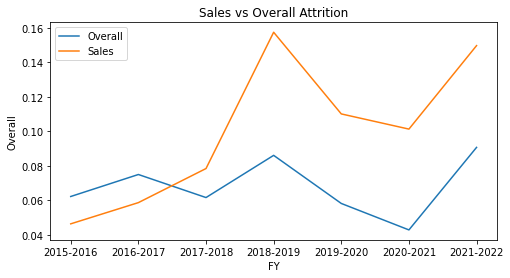

In [67]:
plt.figure(figsize=(8,4))
sns.lineplot(final_summary.FY,final_summary.Overall)
sns.lineplot(final_summary.FY,final_summary.Sales)

plt.legend(['Overall','Sales'])
plt.title("Sales vs Overall Attrition")

Text(0.5, 1.0, 'R&D vs Overall Attrition')

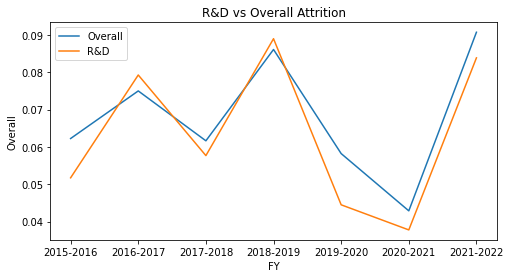

In [68]:
plt.figure(figsize=(8,4))
sns.lineplot(final_summary.FY,final_summary.Overall)
sns.lineplot(final_summary.FY,final_summary['R&D'])
plt.legend(['Overall','R&D'])
plt.title("R&D vs Overall Attrition")

Text(0.5, 1.0, 'Service vs Overall Attrition')

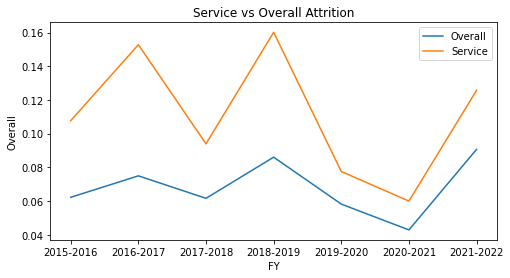

In [69]:
plt.figure(figsize=(8,4))
sns.lineplot(final_summary.FY,final_summary.Overall)
sns.lineplot(final_summary.FY,final_summary['Service'])
plt.legend(['Overall','Service'])
plt.title("Service vs Overall Attrition")

Text(0.5, 1.0, 'OPNS vs Overall Attrition')

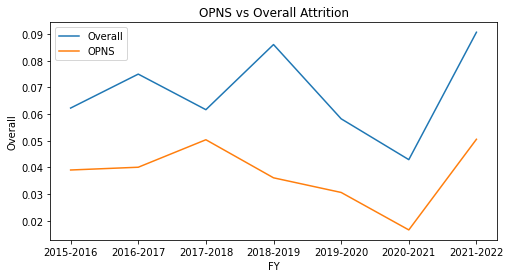

In [70]:
plt.figure(figsize=(8,4))
sns.lineplot(final_summary.FY,final_summary.Overall)
sns.lineplot(final_summary.FY,final_summary['OPNS'])
plt.legend(['Overall','OPNS'])
plt.title("OPNS vs Overall Attrition")

Text(0.5, 1.0, 'CP vs Overall Attrition')

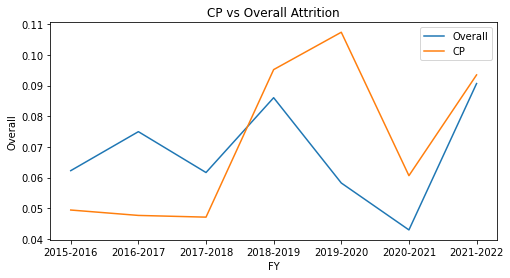

In [71]:
plt.figure(figsize=(8,4))
sns.lineplot(final_summary.FY,final_summary.Overall)
sns.lineplot(final_summary.FY,final_summary['CP'])
plt.legend(['Overall','CP'])
plt.title("CP vs Overall Attrition")

Text(0.5, 1.0, 'PED vs Overall Attrition')

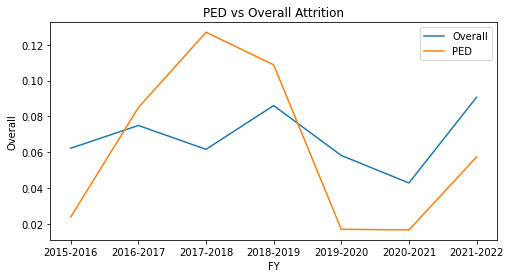

In [72]:
plt.figure(figsize=(8,4))
sns.lineplot(final_summary.FY,final_summary.Overall)
sns.lineplot(final_summary.FY,final_summary['PED'])
plt.legend(['Overall','PED'])
plt.title("PED vs Overall Attrition")

Text(0.5, 1.0, 'NPD vs Overall Attrition')

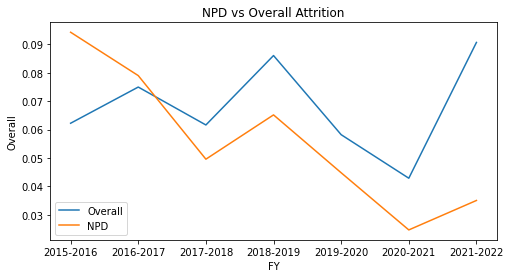

In [73]:
plt.figure(figsize=(8,4))
sns.lineplot(final_summary.FY,final_summary.Overall)
sns.lineplot(final_summary.FY,final_summary['NPD'])
plt.legend(['Overall','NPD'])
plt.title("NPD vs Overall Attrition")

Text(0.5, 1.0, 'QAD vs Overall Attrition')

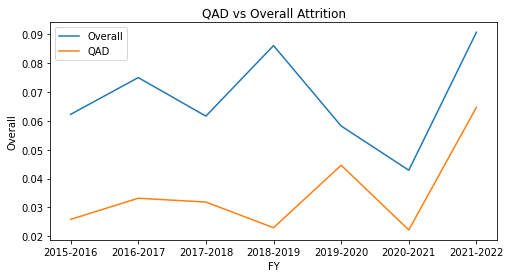

In [74]:
plt.figure(figsize=(8,4))
sns.lineplot(final_summary.FY,final_summary.Overall)
sns.lineplot(final_summary.FY,final_summary['QAD'])
plt.legend(['Overall','QAD'])
plt.title("QAD vs Overall Attrition")

Text(0.5, 1.0, 'HRD vs Overall Attrition')

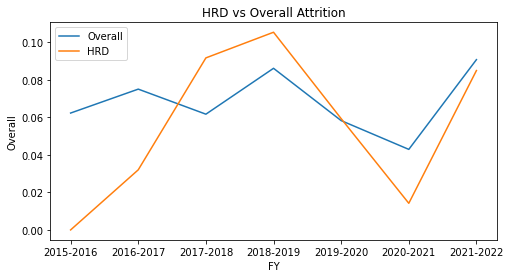

In [75]:
plt.figure(figsize=(8,4))
sns.lineplot(final_summary.FY,final_summary.Overall)
sns.lineplot(final_summary.FY,final_summary['HRD'])
plt.legend(['Overall','HRD'])
plt.title("HRD vs Overall Attrition")

Text(0.5, 1.0, 'IB vs Overall Attrition')

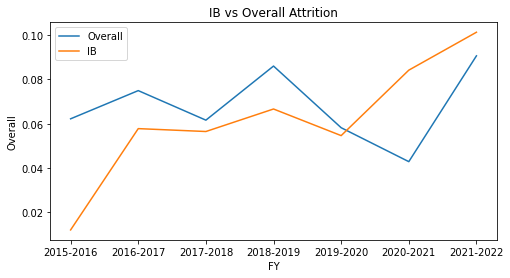

In [76]:
plt.figure(figsize=(8,4))
sns.lineplot(final_summary.FY,final_summary.Overall)
sns.lineplot(final_summary.FY,final_summary['IB'])
plt.legend(['Overall','IB'])
plt.title("IB vs Overall Attrition")

Text(0.5, 1.0, 'PARTS vs Overall Attrition')

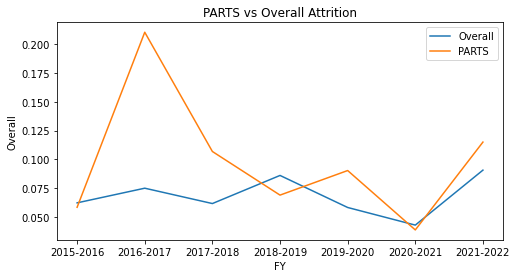

In [77]:
plt.figure(figsize=(8,4))
sns.lineplot(final_summary.FY,final_summary.Overall)
sns.lineplot(final_summary.FY,final_summary['PARTS'])
plt.legend(['Overall','PARTS'])
plt.title("PARTS vs Overall Attrition")

Text(0.5, 1.0, 'FINANCE vs Overall Attrition')

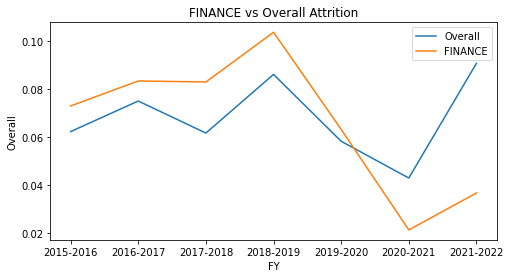

In [78]:
plt.figure(figsize=(8,4))
sns.lineplot(final_summary.FY,final_summary.Overall)
sns.lineplot(final_summary.FY,final_summary['FINANCE'])
plt.legend(['Overall','FINANCE'])
plt.title("FINANCE vs Overall Attrition")

Text(0.5, 1.0, 'IT vs Overall Attrition')

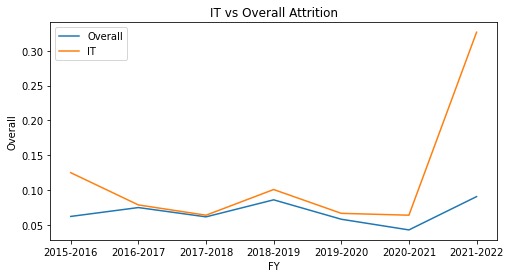

In [79]:
plt.figure(figsize=(8,4))
sns.lineplot(final_summary.FY,final_summary.Overall)
sns.lineplot(final_summary.FY,final_summary['IT'])
plt.legend(['Overall','IT'])
plt.title("IT vs Overall Attrition")

Text(0.5, 1.0, '3W S&S vs Overall Attrition')

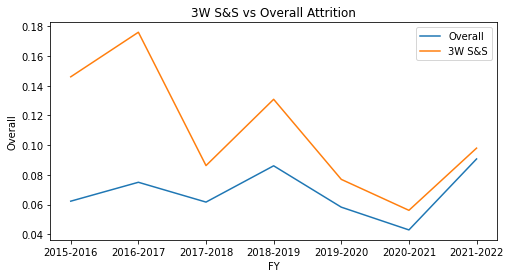

In [80]:
plt.figure(figsize=(8,4))
sns.lineplot(final_summary.FY,final_summary.Overall)
sns.lineplot(final_summary.FY,final_summary['3W S&S'])
plt.legend(['Overall','3W S&S'])
plt.title("3W S&S vs Overall Attrition")

Text(0.5, 1.0, 'DA vs Overall Attrition')

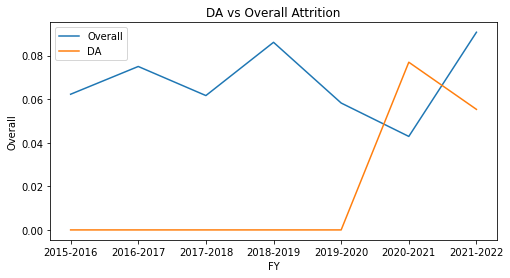

In [81]:
plt.figure(figsize=(8,4))
sns.lineplot(final_summary.FY,final_summary.Overall)
sns.lineplot(final_summary.FY,final_summary['DA'])
plt.legend(['Overall','DA'])
plt.title("DA vs Overall Attrition")

Text(0.5, 1.0, 'MKTG vs Overall Attrition')

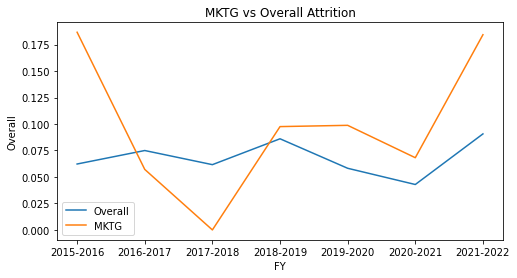

In [82]:
plt.figure(figsize=(8,4))
sns.lineplot(final_summary.FY,final_summary.Overall)
sns.lineplot(final_summary.FY,final_summary['MKTG'])
plt.legend(['Overall','MKTG'])
plt.title("MKTG vs Overall Attrition")

Text(0.5, 1.0, 'AEG vs Overall Attrition')

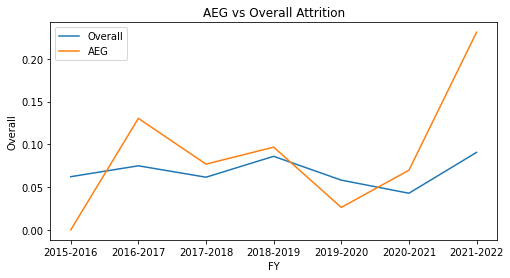

In [83]:
plt.figure(figsize=(8,4))
sns.lineplot(final_summary.FY,final_summary.Overall)
sns.lineplot(final_summary.FY,final_summary['AEG'])
plt.legend(['Overall','AEG'])
plt.title("AEG vs Overall Attrition")

Text(0.5, 1.0, 'ERM vs Overall Attrition')

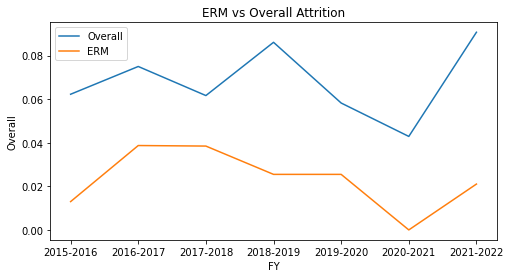

In [84]:
plt.figure(figsize=(8,4))
sns.lineplot(final_summary.FY,final_summary.Overall)
sns.lineplot(final_summary.FY,final_summary['ERM'])
plt.legend(['Overall','ERM'])
plt.title("ERM vs Overall Attrition")